In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ComputerPrice = pd.read_csv('ComputerPricesData.csv',encoding='latin')

print('Shape before deleting duplicate values',ComputerPrice.shape)

ComputerPrice = ComputerPrice.drop_duplicates()

print('Shape after deleting duplicate values', ComputerPrice.shape)

Shape before deleting duplicate values (6259, 10)
Shape after deleting duplicate values (6183, 10)


In [3]:
ComputerPrice.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


## Defining the problem statement
Create a ML model which can predict price of computer

**Target Variable:** price

**Predictors:** ram, hd,cd,etc.

**As the target cariable is continuous , so we need to create a Supervised ML Regression Model**

## Looking at the distribution of Target variable

<AxesSubplot:>

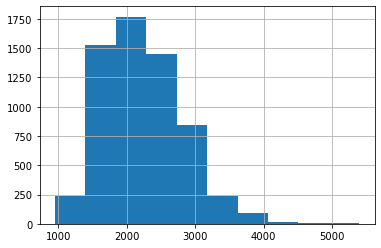

In [4]:
ComputerPrice['price'].hist()

**NOTE:** The data distribution of target vaariable is satisfactory to procees further.

## Basic Data exploration

In [5]:
ComputerPrice.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [6]:
ComputerPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6183 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6183 non-null   int64 
 1   speed    6183 non-null   int64 
 2   hd       6183 non-null   int64 
 3   ram      6183 non-null   int64 
 4   screen   6183 non-null   int64 
 5   cd       6183 non-null   object
 6   multi    6183 non-null   object
 7   premium  6183 non-null   object
 8   ads      6183 non-null   int64 
 9   trend    6183 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 531.4+ KB


In [7]:
ComputerPrice.describe(include='all')

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183,6183,6183,6183.000000,6183.000000
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,no,yes,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3314,5325,5573,NaN,NaN
mean,2221.837943,52.129549,417.760796,8.305353,14.614265,NaN,NaN,NaN,220.906033,15.944364
std,582.042129,21.190655,259.458342,5.649178,0.907304,NaN,NaN,NaN,74.958628,7.903073
min,949.000000,25.000000,80.000000,2.000000,14.000000,NaN,NaN,NaN,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,NaN,NaN,NaN,162.000000,10.000000
50%,2145.000000,50.000000,340.000000,8.000000,14.000000,NaN,NaN,NaN,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,NaN,NaN,NaN,275.000000,22.000000


In [8]:
ComputerPrice.nunique()

price      808
speed        6
hd          59
ram          6
screen       3
cd           2
multi        2
premium      2
ads         34
trend       35
dtype: int64

## Basic Data Exploration

**price:** continuous.**Target Variable**

**speed:** continuous

**hd:** continuous

**ram:** Categorical

**screen:** Categorical

**cd:** Categorical

**multi:** Categorical

**premium:** Categorical

**ads:** continuous

**trend:** continuous

## Visual Exploratory Data Analysis for data distribution 

**Categorical Predictors: ** 'ram', 'screen', 'cd', 'multi', 'premium'

In [20]:
def PlotBarCharts(inpData, colsToPlot):
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of:'+str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

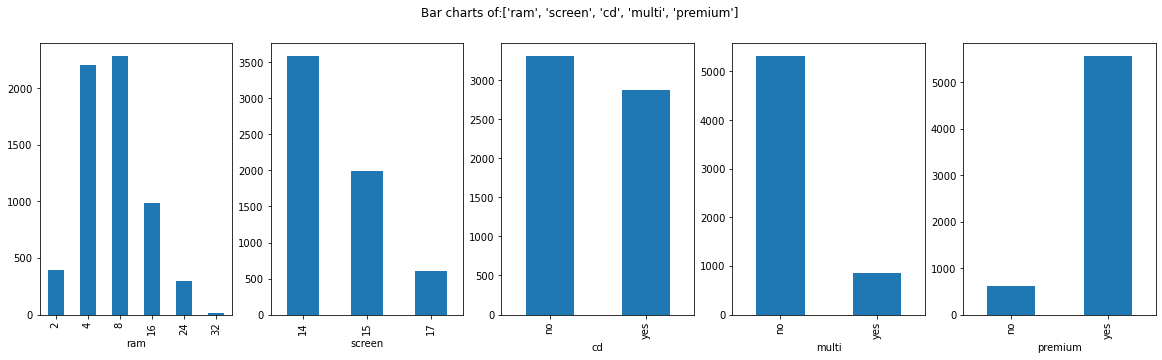

In [21]:
PlotBarCharts(inpData=ComputerPrice,colsToPlot=['ram', 'screen', 'cd', 'multi','premium'])

**Continuous Predictors:**  'speed','hd','ads',and 'trend'

array([[<AxesSubplot:title={'center':'speed'}>,
        <AxesSubplot:title={'center':'hd'}>],
       [<AxesSubplot:title={'center':'ads'}>,
        <AxesSubplot:title={'center':'trend'}>]], dtype=object)

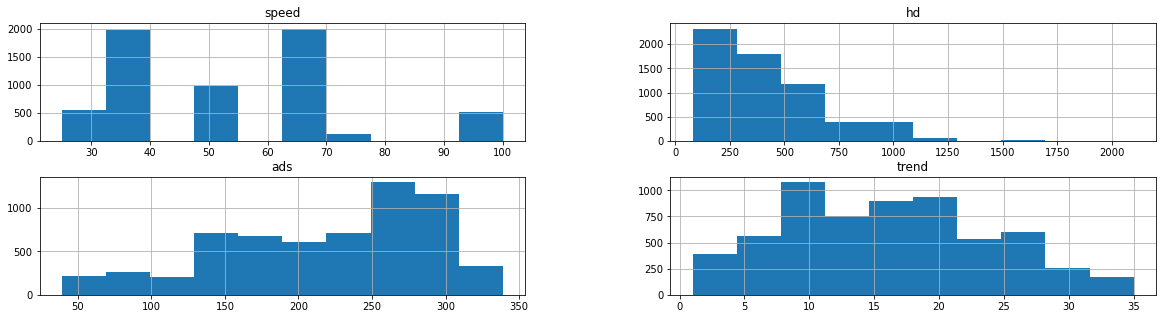

In [22]:
ComputerPrice.hist(['speed','hd','ads','trend'], figsize=(20,5))

## Outlier treatment

In [23]:
ComputerPrice.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

**NOTE:** No missing values found

## Feature Selection

In this case study the Target variable is Continuous, hence below two scenarios will be present

 - Continuous Target Variable Vs Continuous Predictor: **Scatter Plot**
    
 - Continuous Target Variable Vs Categorical Predictor: **Box Plot**

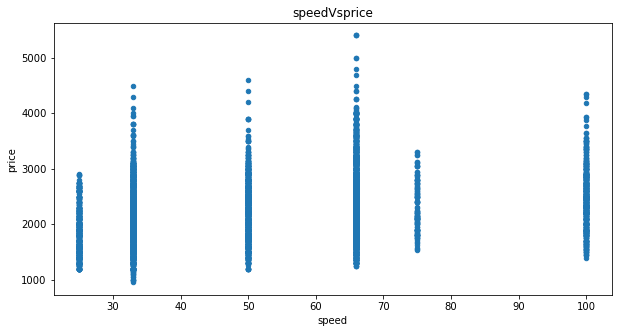

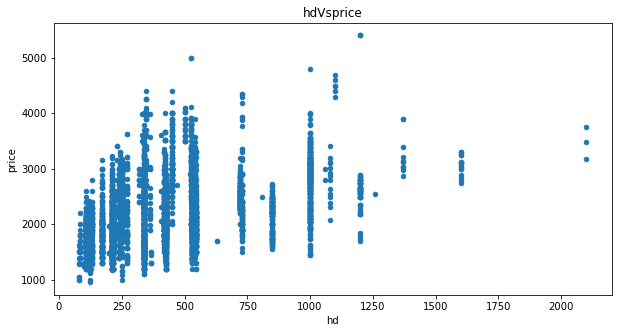

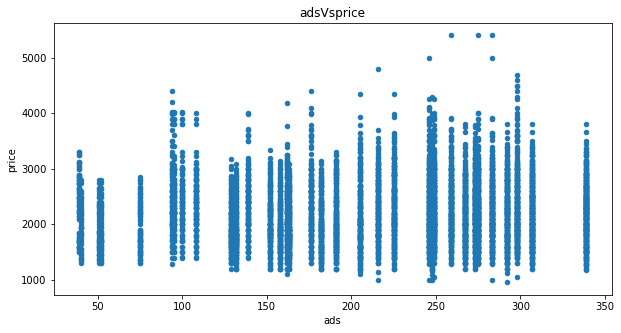

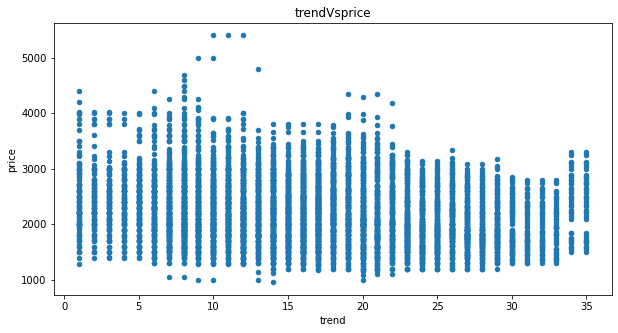

In [24]:
ContinuousCols = ['speed','hd','ads','trend']

for predictor in ContinuousCols:
    ComputerPrice.plot.scatter(x=predictor,y='price',
                               figsize=(10,5),title=predictor+"Vs"+'price')

In [26]:
ContinuousCols = ['price','speed','hd','ads','trend'] 
CorrelationData=ComputerPrice[ContinuousCols].corr()
CorrelationData

,price,speed,hd,ads,trend
price,1.000000,0.298515,0.428845,0.056434,-0.201662
speed,0.298515,1.000000,0.370356,-0.214349,0.404830
hd,0.428845,0.370356,1.000000,-0.323342,0.577599
ads,0.056434,-0.214349,-0.323342,1.000000,-0.320626
trend,-0.201662,0.404830,0.577599,-0.320626,1.000000


In [27]:
CorrelationData['price'][abs(CorrelationData['price']) > 0.2]

price    1.000000
speed    0.298515
hd       0.428845
trend   -0.201662
Name: price, dtype: float64

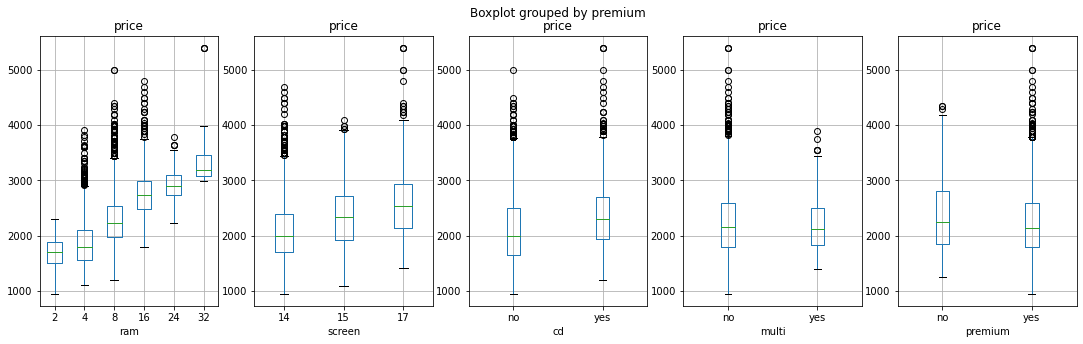

In [31]:
CategoricalColsList=['ram', 'screen', 'cd', 'multi','premium']


fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    ComputerPrice.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [32]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [34]:
CategoricalPredictorList=['ram', 'screen', 'cd', 'multi','premium']
FunctionAnova(inpData=ComputerPrice, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

ram is correlated with price | P-Value: 0.0
screen is correlated with price | P-Value: 1.2830206408407136e-129
cd is correlated with price | P-Value: 8.113565801487017e-55
multi is NOT correlated with price | P-Value: 0.19076936432204794
premium is correlated with price | P-Value: 2.7969949437607514e-10


['ram', 'screen', 'cd', 'premium']

## Final predictors for ML

In [35]:
SelectedColumns=['speed','hd','trend','ram', 'screen', 'cd','premium']

DataForML = ComputerPrice[SelectedColumns]
DataForML.head()

,speed,hd,trend,ram,screen,cd,premium
0,25,80,1,4,14,no,yes
1,33,85,1,2,14,no,yes
2,25,170,1,4,15,no,yes
3,25,170,1,8,14,no,no
4,33,340,1,16,14,no,yes


In [36]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing

In [37]:
# Converting binary nominal values to numeric 
DataForML['cd'].replace({'no':0, 'yes':1}, inplace=True)
DataForML['premium'].replace({'no':0, 'yes':1},inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [38]:
DataForML_Numeric = pd.get_dummies(DataForML)

DataForML_Numeric['price'] = ComputerPrice['price']

DataForML_Numeric.head()

,speed,hd,trend,ram,screen,cd,premium,price
0,25,80,1,4,14,0,1,1499
1,33,85,1,2,14,0,1,1795
2,25,170,1,4,15,0,1,1595
3,25,170,1,8,14,0,0,1849
4,33,340,1,16,14,0,1,3295


## Splitting the data into Training and Testing sample

In [39]:
DataForML_Numeric.columns

Index(['speed', 'hd', 'trend', 'ram', 'screen', 'cd', 'premium', 'price'], dtype='object')

In [40]:
TargetVariable='price'
Predictors=['speed', 'hd', 'trend', 'ram', 'screen', 'cd','premium']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


## Standardization/Normalization of data

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler = MinMaxScaler()

PredictorScalerFit = PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4328, 7)
(4328,)
(1855, 7)
(1855,)


In [43]:
from sklearn import metrics
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training Score:{}'.format(model.score(X_train,y_train)))
    
    predictions=model.predict(X_test)
    print('Predictions are: {}'.format(predictions))
    
    print('\n')
    
    r2_score=metrics.r2_score(y_test,predictions)
    print('r2 score is :{}'.format(r2_score))
    
    print('MAE',metrics.mean_absolute_error(y_test,predictions))
    print('MSE',metrics.mean_squared_error(y_test,predictions))
    print('RMS',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    

    sns.distplot(y_test-predictions)
    
    
    if dump==1:
        file=open('D:\Data Analyst courses\Data Analysis Projects\Computer Price Prediction/Model.pkl','wb')
        pickle.dump(model,file)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

Training Score:0.7687121396752841
Predictions are: [2673.64890805 2678.93884715 2096.39452433 ... 2298.33944995 1545.71045973
 2079.68035521]


r2 score is :0.7616250000371243
MAE 207.70859360914383
MSE 77866.18755308988
RMS 14.412098862037542


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


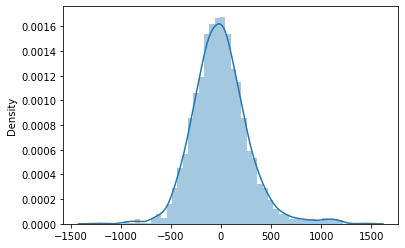

In [45]:
predict(LinearRegression(),0)

Training Score:0.916554959635677
Predictions are: [2792.6 2503.6 2023.8 ... 1961.  1581.8 2343.4]


r2 score is :0.861532237818782
MAE 152.8529380053908
MSE 45231.07180592992
RMS 12.363370818890404


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


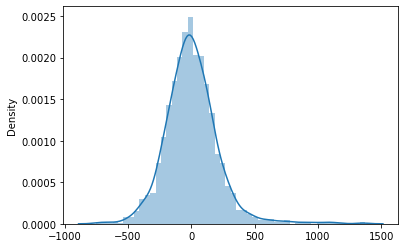

In [46]:
predict(KNeighborsRegressor(),0)

Training Score:0.9710212971938248
Predictions are: [2792.26274451 2713.151      1997.16333333 ... 1933.12       1574.99321429
 2346.62190657]


r2 score is :0.9171412556211667
MAE 121.97135435770723
MSE 27066.154299824128
RMS 11.044064213762397


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


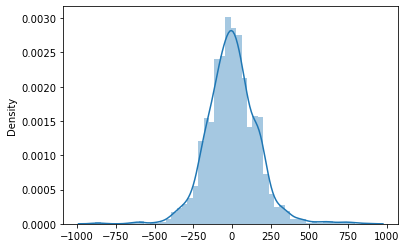

In [47]:
predict(RandomForestRegressor(),0)

Training Score:0.9758947052402996
Predictions are: [2792.6        2944.         1974.         ... 1995.         1576.33333333
 2343.5       ]


r2 score is :0.8910517091071004
MAE 133.51945556839087
MSE 35588.413439229415
RMS 11.555061902404109


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


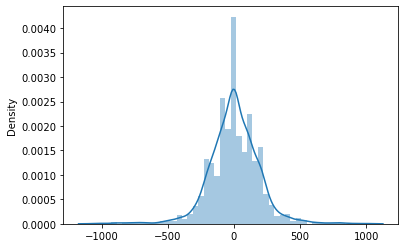

In [48]:
predict(DecisionTreeRegressor(),0)

Training Score:0.6944013959683792
Predictions are: [3204.31531532 3049.02853437 2353.31867058 ... 2300.87667009 1836.85114155
 2155.16510732]


r2 score is :0.6837250332400349
MAE 265.35174650887944
MSE 103312.53648207286
RMS 16.28962082151943


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


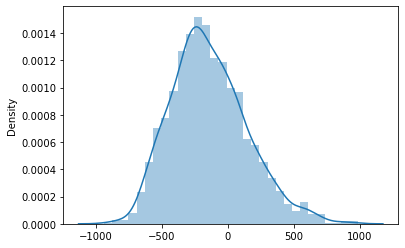

In [49]:
predict(AdaBoostRegressor(),0)

Training Score:0.9658383079370066
Predictions are: [2828.3684 2593.4446 2063.1528 ... 1846.1672 1583.7795 2345.0952]


r2 score is :0.9376912762877317
MAE 106.15855423343793
MSE 20353.404373481884
RMS 10.303327337973784


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


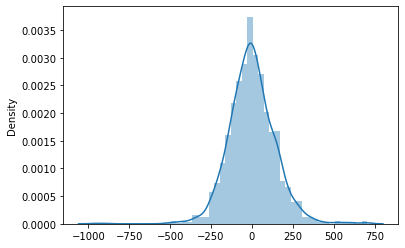

In [51]:
predict(XGBRegressor(),1)

NOTE: XGBoost Give Best Accuracy